In [ ]:
import pandas as pd

df = pd.read_csv('/content/Road_Accidents_Sample.csv', parse_dates=['Date'])

# Convert Time column if not already
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year


In [ ]:
def get_time_band(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

df['Time_Band'] = df['Hour'].apply(get_time_band)

# Display output
df['Time_Band'].value_counts()



,count
Time_Band,
Night,358
Morning,279
Afternoon,212
Evening,151


In [ ]:
weather_insight = df.groupby('Weather_Conditions').agg({
    'Accident_ID': 'count',
    'Number_of_Casualties': 'sum'
}).rename(columns={'Accident_ID': 'Total_Accidents'})

weather_insight['Avg_Casualties_per_Accident'] = (
    weather_insight['Number_of_Casualties'] / weather_insight['Total_Accidents']
)

# Display table
weather_insight


,Total_Accidents,Number_of_Casualties,Avg_Casualties_per_Accident
Weather_Conditions,,,
Clear,586,1733,2.957338
Cloudy,49,159,3.244898
Fog,113,324,2.867257
Rain,207,606,2.927536
Snow,45,147,3.266667


In [ ]:
# Create a flag for severity
df['Is_Severe'] = df['Accident_Severity'].apply(lambda x: 1 if x in ['Fatal', 'Serious'] else 0)

# Group by Urban/Rural and get severity rate
severity_by_zone = df.groupby('Urban_or_Rural')['Is_Severe'].mean().reset_index()
severity_by_zone.columns = ['Zone', 'Severe_Accident_Rate']

# Show output
severity_by_zone


,Zone,Severe_Accident_Rate
0,Rural,0.274238
1,Urban,0.303599


In [ ]:
dangerous_roads = df.groupby('Road_Type').agg({
    'Accident_ID': 'count',
    'Is_Severe': 'mean'
}).rename(columns={'Accident_ID': 'Total_Accidents', 'Is_Severe': 'Severity_Rate'})

# Sort and show top 10
dangerous_roads.sort_values(by='Severity_Rate', ascending=False).head(10)


,Total_Accidents,Severity_Rate
Road_Type,,
Roundabout,213,0.328638
Slip Road,207,0.299517
Dual Carriageway,188,0.292553
One Way,185,0.281081
Single Carriageway,207,0.260870


In [ ]:
vehicle_risk = df.groupby('Vehicle_Type').agg({
    'Accident_ID': 'count',
    'Number_of_Casualties': 'sum',
    'Is_Severe': 'mean'
})

vehicle_risk['Avg_Casualties'] = (
    vehicle_risk['Number_of_Casualties'] / vehicle_risk['Accident_ID']
)

# Show risk by vehicle
vehicle_risk.sort_values(by='Is_Severe', ascending=False)


,Accident_ID,Number_of_Casualties,Is_Severe,Avg_Casualties
Vehicle_Type,,,,
Truck,144,419,0.319444,2.909722
Bus,161,453,0.304348,2.813665
Bicycle,180,553,0.294444,3.072222
Car,168,536,0.285714,3.190476
Motorcycle,196,570,0.280612,2.908163
Auto-Rickshaw,151,438,0.278146,2.900662


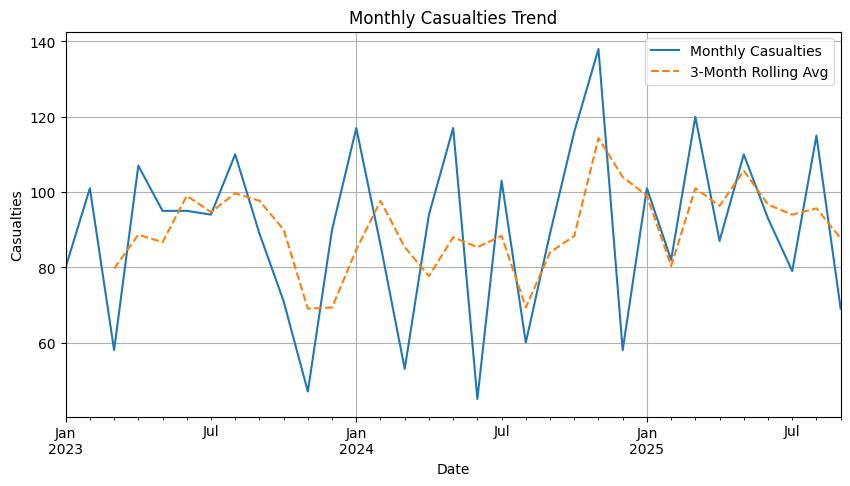

In [ ]:
monthly = df.groupby(df['Date'].dt.to_period('M'))['Number_of_Casualties'].sum()
rolling = monthly.rolling(3).mean()

# Convert PeriodIndex to datetime for plotting
monthly.index = monthly.index.to_timestamp()
rolling.index = rolling.index.to_timestamp()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly.plot(label='Monthly Casualties')
rolling.plot(label='3-Month Rolling Avg', linestyle='--')
plt.title('Monthly Casualties Trend')
plt.ylabel('Casualties')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# 1. Time Band Distribution
time_band_df = df['Time_Band'].value_counts().reset_index().rename(
    columns={'index': 'Time_Band', 'Time_Band': 'Accident_Count'}
)
time_band_df.to_csv('/content/time_band_distribution.csv', index=False)

# 2. Weather Conditions vs Casualty Rate
weather_insight.to_csv('/content/weather_vs_casualties.csv', index=True)

# 3. Urban vs Rural Severity Rate
severity_by_zone.to_csv('/content/severity_by_zone.csv', index=False)

# 4. Top 10 Dangerous Roads
dangerous_roads_sorted = dangerous_roads.sort_values(by='Severity_Rate', ascending=False).head(10)
dangerous_roads_sorted.to_csv('/content/top10_dangerous_roads.csv', index=True)

# 5. Vehicle Risk Index
vehicle_risk.to_csv('/content/vehicle_risk_index.csv', index=True)

# 6. Monthly Casualty Trend
monthly_df = pd.DataFrame({
    'Month': monthly.index.strftime('%Y-%m'),
    'Monthly_Casualties': monthly.values,
    'Rolling_Avg_3_Month': rolling.values
})
monthly_df.to_csv('/content/monthly_casualty_trend.csv', index=False)


In [ ]:
import zipfile

# Create a ZIP file and add all CSVs
with zipfile.ZipFile('/content/road_accident_insights.zip', 'w') as zipf:
    zipf.write('/content/time_band_distribution.csv')
    zipf.write('/content/weather_vs_casualties.csv')
    zipf.write('/content/severity_by_zone.csv')
    zipf.write('/content/top10_dangerous_roads.csv')
    zipf.write('/content/vehicle_risk_index.csv')
    zipf.write('/content/monthly_casualty_trend.csv')


In [ ]:
from google.colab import files
files.download('/content/road_accident_insights.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>